# CBIS-DDSM Dataset Snapshot
Quick, lightweight checks to understand the dataset manifest.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

manifest_path = os.path.join('preprocessed_output', 'manifest.csv')
df = pd.read_csv(manifest_path)
df.head()


,patient_id,participant_id,image_path,mask_path,view,label,abnormality_type
0,P_00005,P_00005,jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036838...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...,CC,1,calcification
1,P_00005,P_00005,jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112079...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...,MLO,1,calcification
2,P_00007,P_00007,jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134871...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...,CC,0,calcification
3,P_00007,P_00007,jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111331...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...,MLO,0,calcification
4,P_00011,P_00011,jpeg/1.3.6.1.4.1.9590.100.1.2.3892083914126807...,jpeg/1.3.6.1.4.1.9590.100.1.2.2956702179135562...,CC,0,calcification


In [2]:
print('Rows:', len(df))
print('Unique patients:', df['participant_id'].nunique())
print('Views:', df['view'].unique())

display(df[['label', 'abnormality_type']].value_counts().reset_index(name='count').head(10))


Rows: 2286
Unique patients: 1136
Views: ['CC' 'MLO']


,label,abnormality_type,count
0,1,mass,637
1,0,mass,577
2,1,calcification,544
3,0,calcification,528


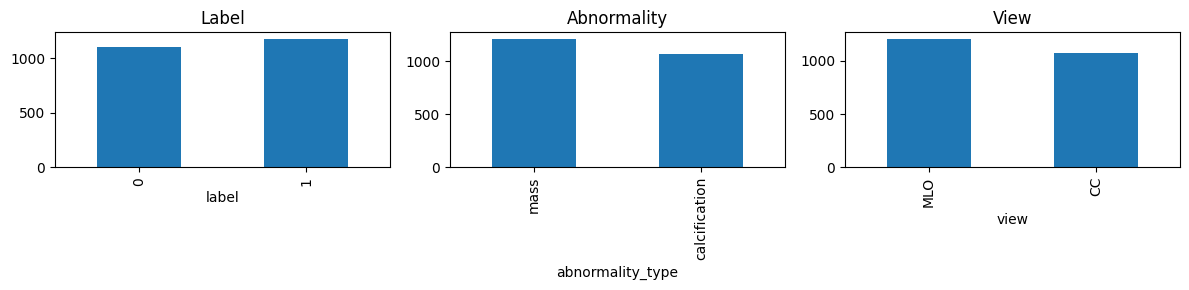

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
df['label'].value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Label')
df['abnormality_type'].value_counts().plot(kind='bar', ax=axes[1], title='Abnormality')
df['view'].value_counts().plot(kind='bar', ax=axes[2], title='View')
plt.tight_layout()
